## PDF Scrapers

In [9]:
import os
fn='161303msf'
fn='ginettaJnrSnetterton2015'
fn='161303trg'
fn='BTCC/2016/TOCA%2F2016%2F162403trg'
fn='/Users/ajh59/Downloads/171503trg'
cmd = 'pdftohtml -xml -nodrm -zoom 1.5 -enc UTF-8 -noframes %s "%s" "%s"' % (
        '',fn+'.pdf', os.path.splitext('BTCC/2017/'+fn.split('/')[-1]+'.xml')[0])
# can't turn off output, so throw away even stderr yeuch
cmd + " >/dev/null 2>&1"
os.system(cmd)

0

In [10]:
fn.split('/')[:-1]

['', 'Users', 'ajh59', 'Downloads']

In [11]:
import lxml.etree

xmldata = open('BTCC/2017/{}.xml'.format(fn.split('/')[-1]),'r').read()
root = lxml.etree.fromstring(xmldata)
pages = list(root)

In [12]:
import pandas as pd
def flatten(el):           
    result = [ (el.text or "") ]
    for sel in el:
        result.append(flatten(sel))
        result.append(sel.tail or "")
    return "".join(result)

def ish(val1,val2,tolerance=3):
    if abs(val1-val2)<=tolerance:
        return True
    return False

In [13]:
def rowstarter(page):
    rownum=0
    for startrow in page:
        if flatten(startrow).strip()!='':
            break
        else: rownum=rownum+1
    return rownum

def pageinfo(page):
    rowstart=rowstarter(page)
    event=flatten(page[rowstart]).strip()
    doctype=flatten(page[rowstart+1]).strip()
    return rowstart,event,doctype

In [14]:
#First page is a cover page
#Second page is a circuit map

#Last page of each session are weather conditions
i=0
for page in pages:
    print(i,pageinfo(page))
    i=i+1

(0, (8, '2017 DUNLOP MSA', 'BRITISH TOURING CAR'))
(1, (12, 'Donington Park National', ''))
(2, (11, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - CLASSIFICATION'))
(3, (2, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(4, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(5, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(6, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(7, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(8, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(9, (0, '2017 Dunlop MSA British Touring Car Championship', 'FREE PRACTICE SESSION 1 - SECTOR ANALYSIS'))
(10, (0, '2017 Dunlop MSA British Touring Car Championship',

In [83]:
import datetime
#http://tgs.github.io/nptime/
from nptime import nptime

def nptimify(t):
    tt=t.split(':')
    if len(tt)==3:
        h=int(tt[0])
        m=int(tt[1])
        if len(tt[2].split('.'))==2:
            s=int(tt[2].split('.')[0])
            ms=int(tt[2].split('.')[1])
        else:
            s=int(t.split(':')[2])
            ms=0
    elif len(tt)==2:
        h=int(tt[0])
        m=int(tt[1])
        if len(tt[2].split('.'))==2:
            s=int(tt[2].split('.')[0])
            ms=int(tt[2].split('.')[1])
        else:
            s=int(t.split(':')[2])
            ms=0
    return nptime(h, m, s, ms)

def npreltimify(t,earliest="0:0:0"):
    return nptimify(t) - nptimify(earliest)

def nprebase(delta,earliest="0:0:0"):
    return delta + nptimify(earliest)

#def nprebaseElapsed()

#Preferred time format
def formatTime(t):
    return float("%.3f" % t)
# Accept times in the form of hh:mm:ss.ss or mm:ss.ss
# Return the equivalent number of seconds
def getTime(ts):
    t=ts.strip()
    if t=='': return pd.to_datetime('')
    if ts=='P': return None
    if 'LAP'.lower() in ts.lower():
        ts=str(1000*int(ts.split(' ')[0]))
    t=ts.split(':')
    if len(t)==3:
        tm=60*int(t[0])+60*int(t[1])+float(t[2])
    elif len(t)==2:
        tm=60*int(t[0])+float(t[1])
    else:
        tm=float(t[0])
    return float(formatTime(tm))

## Lap Chart Scraper

In [16]:
import pandas as pd

In [17]:
def pageview(pages,page):
    for el in pages[page]:
        print( el.attrib['left'], el.attrib['top'],flatten(el))

In [24]:
pageview(pages,65) #5

('26', '93', '2017 Dunlop MSA British Touring Car Championship')
('27', '123', 'ROUND 4 - LAP CHART')
('26', '176', 'LAP 1')
('34', '202', 'NO')
('64', '202', 'BEHIND LAP TIME')
('100', '178', '@ 11:45:15.481')
('38', '224', '80')
('131', '221', '1:17.296')
('38', '239', '11')
('81', '236', '0.906')
('131', '236', '1:18.202')
('38', '253', '16')
('81', '251', '1.194')
('131', '251', '1:18.490')
('38', '268', '25')
('81', '266', '1.806')
('131', '266', '1:19.102')
('38', '283', '52')
('81', '281', '2.641')
('131', '281', '1:19.937')
('44', '298', '4')
('81', '296', '3.485')
('131', '296', '1:20.781')
('38', '313', '33')
('81', '311', '4.036')
('131', '311', '1:21.332')
('38', '328', '55')
('81', '325', '4.319')
('131', '325', '1:21.615')
('44', '343', '5')
('81', '340', '4.654')
('131', '340', '1:21.950')
('38', '358', '12')
('81', '355', '4.839')
('131', '355', '1:22.135')
('38', '372', '40')
('81', '370', '5.040')
('131', '370', '1:22.336')
('38', '387', '66')
('81', '385', '5.211')
(

In [19]:
def columnSpotter(pages,counts=None,raw=None,omittop=0,omitbottom=9999):
    if counts is None: counts={}
    if raw is None: raw=[]
    for page in pages:
        for el in page:
            if 'top' not in el.attrib: continue
            top=int(el.attrib['top'])
            if top<omittop or top>omitbottom: continue 
            left=el.attrib['left']
            raw.append(int(left))
            if left in counts:
                counts[left]=counts[left]+1
            else:
                counts[left]=1
    return counts,raw

/Users/ajh59/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/ajh59/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


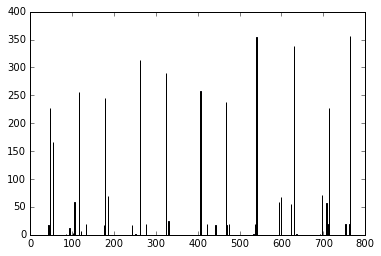

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
def columnCharter(cc):
    ccd=pd.DataFrame.from_dict(cc,orient='index').reset_index()
    ccd.columns=['left','count']
    ccd['left']=ccd['left'].astype(int)
    ccd.sort('left', inplace=True)
    #ccd.plot('left','count',kind='bar')
    plt.bar(ccd['left'], ccd['count'])
    return

#counts,raw=columnSpotter(pages[28:30])
columnCharter(columnSpotter(pages[4:13],omittop=220,omitbottom=1000)[0])

In [374]:
def lapScraper(pages, pagenums):
    laps={}
    for p in pagenums:
        page=pages[p]
        print('---------new page----------')
        event=flatten(page[0]).strip()
        document=flatten(page[1]).strip()
        print(event,document)
        rowval=999
        row=[]
        header=0
        newcol=True
        newrow=False
        for el in page[2:-7]:
            txt=flatten(el).strip()
            #print( el.attrib['left'], el.attrib['top'],txt)
            if 'top' not in el.attrib:continue
            top=int(el.attrib['top'])
            left=int(el.attrib['left'])
            if header>0:
                if header==4:
                    lap=txt
                    laps[lap]=[]
                if header==1:
                    newrow=True
                header=header-1  
            elif newrow or ish(rowval,top):
                newrow=False
                if txt!='D':
                    row.append(txt)
            elif rowval<top:
                laps[lap].append(row)
                newrow=True
                row=[txt]
            elif rowval>top:
                header=3
                if row!=[] and lap in laps:
                    laps[lap].append(row)
                    row=[]
                lap=txt
                laps[lap]=[]
            rowval=top
        laps[lap].append(row)
    return event, document,laps

In [375]:
range(65,69)

[65, 66, 67, 68]

In [376]:
l_e,l_d,laps=lapScraper(pages, range(65,69))#4,13
laps

---------new page----------
('2017 Dunlop MSA British Touring Car Championship', 'ROUND 4 - LAP CHART')
---------new page----------
('2017 Dunlop MSA British Touring Car Championship', 'ROUND 4 - LAP CHART')
---------new page----------
('2017 Dunlop MSA British Touring Car Championship', 'ROUND 4 - LAP CHART')
---------new page----------
('2017 Dunlop MSA British Touring Car Championship', 'ROUND 4 - LAP CHART')


{'LAP 1': [['80', '1:17.296'],
  ['11', '0.906', '1:18.202'],
  ['16', '1.194', '1:18.490'],
  ['25', '1.806', '1:19.102'],
  ['52', '2.641', '1:19.937'],
  ['4', '3.485', '1:20.781'],
  ['33', '4.036', '1:21.332'],
  ['55', '4.319', '1:21.615'],
  ['5', '4.654', '1:21.950'],
  ['12', '4.839', '1:22.135'],
  ['40', '5.040', '1:22.336'],
  ['66', '5.211', '1:22.507'],
  ['77', '5.504', '1:22.800'],
  ['3', '5.800', '1:23.096'],
  ['23', '5.814', '1:23.110'],
  ['2', '6.085', '1:23.381'],
  ['22', '6.319', '1:23.615'],
  ['99', '7.306', '1:24.602'],
  ['31', '7.462', '1:24.758'],
  ['18', '7.720', '1:25.016'],
  ['303', '7.874', '1:25.170'],
  ['48', '8.823', '1:26.119'],
  ['17', '9.145', '1:26.441'],
  ['61', '9.282', '1:26.578'],
  ['10', '9.504', '1:26.800'],
  ['116', '9.527', '1:26.823'],
  ['28', '10.021', '1:27.317'],
  ['7', '10.284', '1:27.580'],
  ['300', '12.086', '1:29.382']],
 'LAP 10': [['16', '1:10.523'],
  ['11', '1.511', '1:10.426'],
  ['25', '1.705', '1:10.333'],
  ['4

In [27]:
#We really should process the data properly as we scrape it
#As it is, hack it...
def lapChartHacker(laps):
    tidylaps={}
    for lap in laps:
        tidylaps[lap]=[]
        for row in laps[lap]:
            #print(row,len(row))
            if len(row)==2:
                tidylaps[lap].append({'num':row[0],
                                      'rawbehind':0, 'behind':0,
                                      'rawtime':row[1], 'laptime':getTime(row[1]),
                                      'pit':False})
            elif len(row)==4:
                tidylaps[lap].append({'num':row[0],
                                      'rawbehind':row[1],'behind':getTime(row[1]),
                                      'rawtime':row[3], 'laptime':getTime(row[3]),
                                      'pit':True})
            else:
                tidylaps[lap].append({'num':row[0],
                                      'rawbehind':row[1],'behind':getTime(row[1]),
                                      'rawtime':row[2], 'laptime':getTime(row[2]),
                                      'pit':False})
    return tidylaps

In [313]:
ll=lapChartHacker(laps)
#ll

In [29]:
def lapOutputter(ll):
    tmp=[]
    for lap in ll:
        for res in ll[lap]:
            res['lap']=int(lap.replace('LAP ',''))
            tmp.append(res)
    #tmp
    df=pd.DataFrame.from_dict(tmp)
    return df

In [389]:
df_laps=lapOutputter(ll)
df_laps.sort_values(by=['num','lap'])

,behind,lap,laptime,num,pit,rawbehind,rawtime
106,9.504,1,86.800,10,False,9.504,1:26.800
24,10.884,2,73.308,10,False,10.884,1:13.308
51,11.449,3,71.871,10,False,11.449,1:11.871
185,11.575,4,71.284,10,False,11.575,1:11.284
260,11.968,5,71.500,10,False,11.968,1:11.500
130,11.961,6,70.799,10,False,11.961,1:10.799
156,12.301,7,70.967,10,False,12.301,1:10.967
232,13.302,8,71.287,10,False,13.302,1:11.287
407,14.607,9,71.881,10,False,14.607,1:11.881
356,15.594,10,71.510,10,False,15.594,1:11.510


## Grid Scraper

In [390]:
pageview(pages,51)

('75', '1059', '')
('26', '93', '2017 Dunlop MSA British Touring Car Championship')
('27', '123', 'ROUND 4 - GRID (16 Laps) - AMENDED')
('29', '209', 'ROW 16')
('112', '206', '31')
('166', '203', 'Ashley SUTTON')
('130', '197', '116')
('473', '182', '32')
('527', '179', 'Jake HILL')
('496', '173', '24')
('29', '263', 'ROW 15')
('112', '260', '29')
('166', '257', 'Ant WHORTON-EALES(R)')
('165', '239', '1:10.697')
('135', '251', '10')
('473', '236', '30')
('527', '233', 'Stephen JELLEY')
('526', '215', '1:10.708')
('502', '227', '7')
('29', '317', 'ROW 14')
('112', '314', '27')
('166', '312', 'Luke DAVENPORT(R)')
('165', '294', '1:10.675')
('130', '305', '300')
('473', '290', '28')
('527', '287', 'Josh PRICE(R)')
('526', '269', '1:10.691')
('496', '281', '28')
('29', '371', 'ROW 13')
('112', '368', '25')
('166', '366', 'Ollie JACKSON')
('165', '348', '1:10.492')
('135', '359', '48')
('473', '344', '26')
('527', '341', 'Martin DEPPER')
('526', '323', '1:10.668')
('496', '335', '30')
('29'

In [391]:
def gridScraper(pages,pagenum):
    print('---------new grid scrape----------')
    page=pages[pagenum]

    rownum=rowstarter(page)
    
    event=flatten(page[rownum]).strip()
    doctype=flatten(page[rownum+1]).strip()
    print(event,doctype)
    if not "GRID" in doctype: return None
    
    rowval=999
    row=[]
    header=0
    newcol=True
    newrow=False
    grid=[]
    gridpos=[]
    gridrow=None
    rowstart=rownum+3
    for el in page[rowstart:]:
        txt=flatten(el).strip()
        #print(txt)
        #print( el.attrib['left'], el.attrib['top'],txt)
        top=int(el.attrib['top'])
        left=int(el.attrib['left'])
        
        if txt.startswith('ROW'):
            pass
        elif len(gridpos)==2 and '.' not in txt : #no time
            gridpos.append('')
            gridpos.append(txt)
        else:
            gridpos.append(txt)
        if len(gridpos)==4:
            grid.append(gridpos)
            #print(gridpos)
            gridpos=[]
        if txt=='Pole': break
    grid.reverse()
    return event,doctype,grid
        


In [392]:
g_e,g_d,g=gridScraper(pages,51)
g

---------new grid scrape----------
('2017 Dunlop MSA British Touring Car Championship', 'ROUND 4 - GRID (16 Laps) - AMENDED')


[['2', 'Jack GOFF', '1:09.555', '31'],
 ['1', 'Rob AUSTIN', '1:09.514', '11'],
 ['4', 'Aiden MOFFAT', '1:09.728', '16'],
 ['3', 'Tom INGRAM', '1:09.710', '80'],
 ['6', 'Gordon SHEDDEN', '1:09.803', '52'],
 ['5', 'Matt NEAL', '1:09.753', '25'],
 ['8', 'Adam MORGAN', '1:09.907', '33'],
 ['7', 'Michael EPPS', '1:09.819', '12'],
 ['10', 'Colin TURKINGTON', '1:09.939', '4'],
 ['9', 'Jeff SMITH', '1:09.933', '55'],
 ['12', 'Tom CHILTON', '1:09.995', '2'],
 ['11', 'Aron TAYLOR-SMITH', '1:09.957', '40'],
 ['14', 'Andrew JORDAN', '1:10.032', '77'],
 ['13', 'Robert COLLARD', '1:09.998', '5'],
 ['16', 'Daniel LLOYD', '1:10.149', '23'],
 ['15', 'Jason PLATO', '1:10.042', '99'],
 ['18', 'Mat JACKSON', '1:10.205', '3'],
 ['17', 'Josh COOK', '1:10.194', '66'],
 ['20', 'Chris SMILEY', '1:10.250', '22'],
 ['19', 'Senna PROCTOR(R)', '1:10.211', '18'],
 ['22', 'Dave NEWSHAM', '1:10.315', '17'],
 ['21', 'Matt SIMPSON', '1:10.290', '303'],
 ['24', 'Will BURNS(R)', '1:10.427', '61'],
 ['23', 'James COLE', '

In [393]:
df_grid=pd.DataFrame(g,columns=['pos','driverName','rawtime','num'])
df_grid.head()

,pos,driverName,rawtime,num
0,2,Jack GOFF,1:09.555,31
1,1,Rob AUSTIN,1:09.514,11
2,4,Aiden MOFFAT,1:09.728,16
3,3,Tom INGRAM,1:09.710,80
4,6,Gordon SHEDDEN,1:09.803,52


In [394]:
df_grid['grid_laptime']=df_grid['rawtime'].apply(getTime)
df_grid['pos']=df_grid['pos'].astype(int)
df_grid=df_grid.rename(columns={'pos':'grid','rawtime':'grid_rawtime'})
df_grid=df_grid.sort_values(['grid','grid_laptime'])
df_grid.reset_index(drop=True,inplace=True)
df_grid

,grid,driverName,grid_rawtime,num,grid_laptime
0,1,Rob AUSTIN,1:09.514,11,69.514
1,2,Jack GOFF,1:09.555,31,69.555
2,3,Tom INGRAM,1:09.710,80,69.71
3,4,Aiden MOFFAT,1:09.728,16,69.728
4,5,Matt NEAL,1:09.753,25,69.753
5,6,Gordon SHEDDEN,1:09.803,52,69.803
6,7,Michael EPPS,1:09.819,12,69.819
7,8,Adam MORGAN,1:09.907,33,69.907
8,9,Jeff SMITH,1:09.933,55,69.933
9,10,Colin TURKINGTON,1:09.939,4,69.939


## Annotated Table

In [395]:
df_laps=df_laps.merge(df_grid[['num','driverName']])
df_laps.head()

,behind,lap,laptime,num,pit,rawbehind,rawtime,driverName
0,0.000,2,71.928,80,False,0,1:11.928,Tom INGRAM
1,0.000,3,71.306,80,False,0,1:11.306,Tom INGRAM
2,14.539,16,72.098,80,False,14.539,1:12.098,Tom INGRAM
3,0.000,1,77.296,80,False,0,1:17.296,Tom INGRAM
4,3.020,6,73.027,80,False,3.020,1:13.027,Tom INGRAM


In [400]:
if g_e!=l_e: print('Event mismatch?')
elif g_d.split('-')[0].strip()!=l_d.split('-')[0].strip(): print('Round mismatch')
else:
    fn='btcc_{}.csv'.format(l_d.replace(' ',''))
    print('Saving *{} - {}* as `{}`'.format(l_e,l_d,fn))
    df_laps.to_csv(fn,index=False)
    
    fn='btcc_{}.csv'.format('-'.join([g_d.split('-')[0],g_d.split('-')[1].split()[0]]).replace(' ',''))
    print('Saving *{} - {}* as `{}`'.format(g_e,g_d,fn))
    df_grid.to_csv(fn,index=False)

Saving *2017 Dunlop MSA British Touring Car Championship - ROUND 4 - LAP CHART* as `btcc_ROUND4-LAPCHART.csv`
Saving *2017 Dunlop MSA British Touring Car Championship - ROUND 4 - GRID (16 Laps) - AMENDED* as `btcc_ROUND4-GRID.csv`


## Classification Scraper

In [144]:
pageview(pages,72)

('26', '93', '2017 Dunlop MSA British Touring Car Championship')
('27', '123', 'ROUND 5 - CLASSIFICATION')
('26', '172', 'POS')
('64', '172', 'NO')
('98', '172', 'CL')
('157', '172', 'DRIVER / TEAM')
('391', '172', 'CAR')
('804', '172', 'BEST ON')
('553', '172', 'LAPS')
('663', '172', 'GAP')
('714', '172', 'DIFF')
('608', '172', 'TIME')
('756', '172', 'MPH')
('132', '172', 'PIC')
('44', '198', '1')
('68', '198', '80')
('157', '192', 'Tom INGRAM (GBR)')
('391', '196', 'Toyota Avensis')
('858', '198', '8')
('563', '198', '16')
('596', '198', '19:09.281')
('797', '198', '1:10.512')
('757', '198', '99.06')
('144', '200', '1 Speedworks Motorsport')
('44', '221', '2')
('74', '222', '5')
('98', '219', 'M')
('157', '215', 'Robert COLLARD (GBR)')
('391', '219', 'BMW 125i M Sport')
('858', '221', '7')
('563', '221', '16')
('667', '221', '3.865')
('596', '221', '19:13.146')
('797', '221', '1:10.773')
('757', '221', '98.73')
('144', '224', '1')
('718', '221', '3.865')
('157', '227', 'Team BMW')
('

/Users/ajh59/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


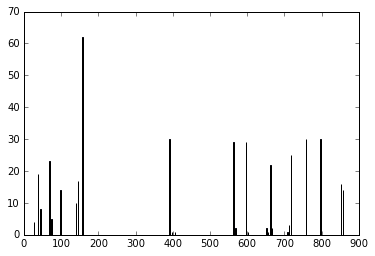

In [145]:
columnCharter(columnSpotter(pages[72:73],omittop=220,omitbottom=1000)[0])

In [140]:
#via https://gist.github.com/drewda/1299198
def getJenksBreaks( dataList, numClass ):
    dataList.sort()
    mat1 = []
    for i in range(0,len(dataList)+1):
        temp = []
        for j in range(0,numClass+1):
            temp.append(0)
        mat1.append(temp)
    
    mat2 = []
    for i in range(0,len(dataList)+1):
        temp = []
        for j in range(0,numClass+1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1,numClass+1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2,len(dataList)+1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2,len(dataList)+1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1,l+1):
            i3 = l - m + 1
            val = float(dataList[i3-1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2,numClass+1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v

    k = len(dataList)
    kclass = []
    for i in range(0,numClass+1):
        kclass.append(0)
    kclass[numClass] = float(dataList[len(dataList) - 1])
    countNum = numClass
    while countNum >= 2:#print "rank = " + str(mat1[k][countNum])
        id = int((mat1[k][countNum]) - 2)
        #print "val = " + str(dataList[id])
        kclass[countNum - 1] = dataList[id]
        k = int((mat1[k][countNum] - 1))
        countNum -= 1
    return kclass
  
def getGVF( dataList, numClass ):
    """
    The Goodness of Variance Fit (GVF) is found by taking the 
    difference between the squared deviations
    from the array mean (SDAM) and the squared deviations from the 
    class means (SDCM), and dividing by the SDAM
    """
    breaks = getJenksBreaks(dataList, numClass)
    dataList.sort()
    listMean = sum(dataList)/len(dataList)
    print listMean
    SDAM = 0.0
    for i in range(0,len(dataList)):
        sqDev = (dataList[i] - listMean)**2
        SDAM += sqDev
    SDCM = 0.0
    for i in range(0,numClass):
        if breaks[i] == 0:
            classStart = 0
        else:
            classStart = dataList.index(breaks[i])
            classStart += 1
        
        classEnd = dataList.index(breaks[i+1])
        classList = dataList[classStart:classEnd+1]
        classMean = sum(classList)/len(classList)
        print classMean
        preSDCM = 0.0
        for j in range(0,len(classList)):
            sqDev2 = (classList[j] - classMean)**2
            preSDCM += sqDev2
        SDCM += preSDCM
    return (SDAM - SDCM)/SDAM
  
# written by Drew
# used after running getJenksBreaks()
def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
              return i
    return len(breaks) - 1

In [152]:
raw

[26,
 26,
 26,
 26,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 74,
 74,
 74,
 74,
 74,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 139,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,
 391,

/Users/ajh59/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


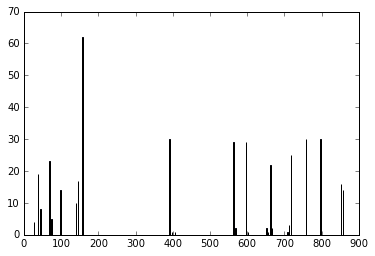

In [176]:
columnCharter(columnSpotter(pages[72:73],omittop=220,omitbottom=1000)[0])

In [309]:
raw=columnSpotter(pages[72:73],omittop=220,omitbottom=1000)[1]
jb=getJenksBreaks( raw, 13 )
jb

[0, 44, 74, 98, 144, 157, 406, 568, 602, 667, 718, 757, 797, 858.0]

In [310]:
def getColBand_classification(left):
    band=None
    if left<45:
        band='pos'
    elif left< 75:
        band='no'
    elif left< 100:
        band='cl'
    elif left< 150:
        band='pic'
    elif left< 200:
        band='driver'
    elif left<  410:
        band='car'        
    elif left< 570:
        band='laps'
    elif left< 605 :
        band='time' 
    elif left< 670:
        band='gap'
    elif left< 720:
        band='diff'
    elif left< 760:
        band='mph' 
    elif left< 800 :
        band='best'
    else:
        band='on' 
    return band

def getColBand_classification(left):
    band=None
    if left<45:
        band='pos'
    elif left< 75:
        band='no'
    elif left< 99:
        band='cl'
    elif left< 145:
        band='pic'
    elif left< 158:
        band='driver'
    elif left<  406:
        band='car'        
    elif left< 569:
        band='laps'
    elif left< 603 :
        band='time' 
    elif left< 668:
        band='gap'
    elif left< 719:
        band='diff'
    elif left< 758:
        band='mph' 
    elif left< 798 :
        band='best'
    else:
        band='on' 
    return band

def classificationScraper(pages,pagenum):
    print('---------new classification scrape----------')
    
    page=pages[pagenum]

    rownum=rowstarter(page)
    
    event=page[rownum]
    doctype=page[rownum+1]
    rowstart=rownum+2
    if not "CLASSIFICATION" in flatten(doctype).strip(): return None
    
    headertop=int(page[rowstart].attrib['top'])
    
    #Get headers
    headers={}
    for el in page[rowstart:]:
        top=int(el.attrib['top'])
        if ish(headertop,top) is not True: break
        txt=flatten(el).strip()
        headers[txt]={'left':int(el.attrib['left'])}
        rowstart=rowstart+1
    
    rowdata={}
    rows=[]
    #drows=[]
    #drowdata={}
    curr_rowtop=int(page[rowstart].attrib['top'])
    for el in page[rowstart:]:
        rowtop=int(el.attrib['top'])
        currleft=int(el.attrib['left'])
        txt=flatten(el).strip()

        if 'NOT CLASSIFIED' in txt: continue
        if 'FASTEST LAP' in txt: break
            
        if ish(rowtop,curr_rowtop,10) is not True:
            #new row
            #print('new row')
            curr_rowtop=rowtop
            rows.append(rowdata)
            rowdata={}
            
            #drows.append(drowdata)
            #drowdata={}
            
        #rowdata.append(txt)
        rowdata[getColBand_classification(currleft)]=txt
        
        #for key in headers:
        #    if ish(headers[key]['left'],int(el.attrib['left'])):
        #        drowdata[key]=txt
        #        break
    
    return headers,rows#,drows

In [311]:
cc,dd=classificationScraper(pages,72)
cc, dd

---------new classification scrape----------


({'BEST ON': {'left': 804},
  'CAR': {'left': 391},
  'CL': {'left': 98},
  'DIFF': {'left': 714},
  'DRIVER / TEAM': {'left': 157},
  'GAP': {'left': 663},
  'LAPS': {'left': 553},
  'MPH': {'left': 756},
  'NO': {'left': 64},
  'PIC': {'left': 132},
  'POS': {'left': 26},
  'TIME': {'left': 608}},
 [{'best': '1:10.512',
   'car': 'Toyota Avensis',
   'driver': 'Tom INGRAM (GBR)',
   'laps': '16',
   'mph': '99.06',
   'no': '80',
   'on': '8',
   'pic': '1 Speedworks Motorsport',
   'pos': '1',
   'time': '19:09.281'},
  {'best': '1:10.773',
   'car': 'BMW 125i M Sport',
   'cl': 'M',
   'diff': '3.865',
   'driver': 'Team BMW',
   'gap': '3.865',
   'laps': '16',
   'mph': '98.73',
   'no': '5',
   'on': '7',
   'pic': '1',
   'pos': '2',
   'time': '19:13.146'},
  {'best': '1:10.487',
   'car': 'Subaru Levorg',
   'cl': 'M',
   'diff': '0.220',
   'driver': 'Adrian Flux Subaru Racing',
   'gap': '4.085',
   'laps': '16',
   'mph': '98.71',
   'on': '13',
   'pic': '2',
   'pos': '3

In [312]:
pd.DataFrame(dd)[['pos','no','cl','pic','driver','car','laps','time','gap','diff','mph','best','on']]

,pos,no,cl,pic,driver,car,laps,time,gap,diff,mph,best,on
0,1,80,NaN,1 Speedworks Motorsport,Tom INGRAM (GBR),Toyota Avensis,16,19:09.281,NaN,NaN,99.06,1:10.512,8
1,2,5,M,1,Team BMW,BMW 125i M Sport,16,19:13.146,3.865,3.865,98.73,1:10.773,7
2,3 116,NaN,M,2,Adrian Flux Subaru Racing,Subaru Levorg,16,19:13.366,4.085,0.220,98.71,1:10.487,13
3,4,66,NaN,2,Team Parker with Maximum Motorsport,Ford Focus,16,19:19.393,10.112,6.027,98.20,1:11.035,11
4,5,4,M,3,Team BMW,BMW 125i M Sport,16,19:23.415,14.134,4.022,97.86,1:10.878,11
5,6,52,M,4,Halfords Yuasa Racing,Honda Civic Type R,16,19:24.621,15.340,1.206,97.76,1:11.120,8
6,7,25,M,5,Halfords Yuasa Racing,Honda Civic Type R,16,19:30.098,20.817,5.477,97.30,1:11.558,11
7,8,17,NaN,3,BTC Norlin Racing,Chevrolet Cruze,16,19:31.193,21.912,1.095,97.21,1:11.423,15
8,9,31,NaN,4,Eurotech Racing,Honda Civic Type R,16,19:34.074,24.793,2.881,96.97,1:11.640,8
9,10,2,M,6,Power Maxed Racing,Vauxhall Astra,16,19:36.951,27.670,2.877,96.73,1:11.253,7


## Best Speeds Scraper



In [136]:
def getHeaders(page,rowstart):
    headertop=int(page[rowstart].attrib['top'])
    
    #Get headers
    headers={}
    for el in page[rowstart:]:
        top=int(el.attrib['top'])
        print(top)
        if ish(headertop,top) is not True: break
        txt=flatten(el).strip()
        print(txt)
        headers[txt]={'left':int(el.attrib['left'])}
        rowstart=rowstart+1
    return headers,rowstart

In [210]:
def bestSpeedsScraper(pages,pagenum):
    print('---------new best speeds scrape----------')
    
    page=pages[pagenum]
    rowstart,event,doctype = pageinfo(page)
    #headers,rowstart=getHeaders(page,rowstart)
    
    #Get as far as FINISH LINE
    for el in page[rowstart:]:
        txt=flatten(el).strip()
        rowstart=rowstart+1
        if txt=='1':
            break
    for el in page[rowstart:]:
        if int(el.attrib['left'])>50:
            break
        rowstart=rowstart+1
    
    bests={"inter1":[],"inter2":[],"finish":[]}
    rowdata=[]
    currleft=int(page[rowstart].attrib['left'])
    currtop=int(page[rowstart].attrib['top'])
    trapnum=0
    traps=["inter1","inter2","finish"]
    print('currtop',currtop)
    for el in page[rowstart:]:
        left=int(el.attrib['left'])
        top=int(el.attrib['top'])
        if top>currtop+100:break
        if left<currleft:
            print('top',top,currtop,left,trapnum,rowdata)
            bests[traps[trapnum]].append(rowdata)
            rowdata=[]
        elif (currtop-top)>10:
            bests[traps[trapnum]].append(rowdata)
            trapnum=trapnum+1
            rowdata=[]
        currleft=left
        currtop=top
        txt=flatten(el).strip()
        rowdata.append(txt)
        #if ish(headertop,top) is not True: break
        #print(txt)
        
    return bests #event, doctype,headers
    

In [495]:
bs=bestSpeedsScraper(pages,26)
bs

---------new best speeds scrape----------
('currtop', 215)
('top', 232, 215, 76, 0, ['44', 'MATTHIESEN (R)', '94.6'])
('top', 249, 232, 76, 0, ['75', 'MIDDLETON (R)', '94.3'])
('top', 266, 249, 76, 0, ['21', 'BROWN', '94.1'])
('top', 283, 266, 76, 0, ['83', 'HORNBY (R)', '94.1'])
('top', 300, 283, 76, 0, ['23', 'MONGER', '93.9'])
('top', 317, 300, 76, 0, ['31', 'ROBERTS (R)', '93.9'])
('top', 334, 317, 76, 0, ['12', 'DAY (R)', '93.8'])
('top', 351, 334, 76, 0, ['33', 'HAWKEY (R)', '93.8'])
('top', 368, 351, 76, 0, ['45', 'ZELOS', '93.8'])
('top', 385, 368, 76, 0, ['38', 'CAROLINE', '93.7'])
('top', 402, 385, 76, 0, ['66', 'PROCTOR', '93.7'])
('top', 419, 402, 76, 0, ['50', 'NICOSIA (R)', '93.4'])
('top', 436, 419, 76, 0, ['77', 'PEREZ (R)', '93.3'])
('top', 453, 436, 76, 0, ['71', 'TREGURTHA (R)', '93.2'])
('top', 470, 453, 76, 0, ['28', 'FAGG (R)', '93.2'])
('top', 487, 470, 76, 0, ['67', 'BIRD (R)', '92.8'])
('top', 504, 487, 76, 0, ['25', 'GRADY (R)', '92.3'])
('top', 521, 504, 76, 

{'finish': [['44', 'MATTHIESEN (R)', '98.2'],
  ['66', 'PROCTOR', '97.6'],
  ['75', 'MIDDLETON (R)', '97.5'],
  ['12', 'DAY (R)', '97.3'],
  ['83', 'HORNBY (R)', '97.2'],
  ['71', 'TREGURTHA (R)', '97.1'],
  ['31', 'ROBERTS (R)', '96.9'],
  ['21', 'BROWN', '96.9'],
  ['50', 'NICOSIA (R)', '96.9'],
  ['23', 'MONGER', '96.8'],
  ['45', 'ZELOS', '96.5'],
  ['77', 'PEREZ (R)', '96.4'],
  ['33', 'HAWKEY (R)', '96.2'],
  ['25', 'GRADY (R)', '96.1'],
  ['38', 'CAROLINE', '95.8'],
  ['28', 'FAGG (R)', '95.5'],
  ['67', 'BIRD (R)', '95.4'],
  ['27', 'WOODER (R)', '95.1'],
  ['42', 'HADFIELD', '95.1'],
  ['22', 'GREEN (R)', '95.0'],
  ['99', 'BAILEY (R)', '93.9'],
  ['26', 'DeFRANCESCO (R)', '92.6']],
 'inter1': [['44', 'MATTHIESEN (R)', '94.6'],
  ['75', 'MIDDLETON (R)', '94.3'],
  ['21', 'BROWN', '94.1'],
  ['83', 'HORNBY (R)', '94.1'],
  ['23', 'MONGER', '93.9'],
  ['31', 'ROBERTS (R)', '93.9'],
  ['12', 'DAY (R)', '93.8'],
  ['33', 'HAWKEY (R)', '93.8'],
  ['45', 'ZELOS', '93.8'],
  ['38', '

In [498]:
pd.DataFrame(bs['inter1'],columns=['num','name','mph'])

,num,name,mph
0,44,MATTHIESEN (R),94.6
1,75,MIDDLETON (R),94.3
2,21,BROWN,94.1
3,83,HORNBY (R),94.1
4,23,MONGER,93.9
5,31,ROBERTS (R),93.9
6,12,DAY (R),93.8
7,33,HAWKEY (R),93.8
8,45,ZELOS,93.8
9,38,CAROLINE,93.7


In [499]:
pd.DataFrame(bs['inter2'],columns=['num','name','mph'])

,num,name,mph
0,44,MATTHIESEN (R),108.2
1,66,PROCTOR,108.2
2,31,ROBERTS (R),107.5
3,83,HORNBY (R),107.5
4,77,PEREZ (R),107.2
5,12,DAY (R),106.6
6,21,BROWN,106.6
7,28,FAGG (R),106.6
8,33,HAWKEY (R),106.5
9,45,ZELOS,106.5


In [500]:
pd.DataFrame(bs['finish'],columns=['num','name','mph'])

,num,name,mph
0,44,MATTHIESEN (R),98.2
1,66,PROCTOR,97.6
2,75,MIDDLETON (R),97.5
3,12,DAY (R),97.3
4,83,HORNBY (R),97.2
5,71,TREGURTHA (R),97.1
6,31,ROBERTS (R),96.9
7,21,BROWN,96.9
8,50,NICOSIA (R),96.9
9,23,MONGER,96.8


## Best Sectors Scraper

In [287]:
#http://stackoverflow.com/a/5389547/454773
from itertools import izip

def pairwise(iterable):
    "s -> (s0,s1), (s2,s3), (s4, s5), ..."
    a = iter(iterable)
    return izip(a, a)


In [290]:
def bestSectorsScraper(pages,pagenum):
    print('---------new best speeds scrape----------')
    
    page=pages[pagenum]
    rowstart,event,doctype = pageinfo(page)
    #headers,rowstart=getHeaders(page,rowstart)
    
    #Get as far as FINISH LINE
    for el in page[rowstart:]:
        txt=flatten(el).strip()
        rowstart=rowstart+1
        if txt=='1':
            break
    for el in page[rowstart:]:
        if int(el.attrib['left'])>50:
            break
        rowstart=rowstart+1
    
    bests={"sector1":[],"sector2":[],"sector3":[],"ideal":[]}
    rowdata=[]
    currleft=int(page[rowstart].attrib['left'])
    currtop=int(page[rowstart].attrib['top'])
    trapnum=0
    traps=["sector1","sector2","sector3","ideal"]
    skipper=False
    for el in page[rowstart:]:
        left=int(el.attrib['left'])
        top=int(el.attrib['top'])
        if top>currtop+100:break
        if left<currleft:
            #print('top',top,currtop,left,trapnum,rowdata)
            if rowdata!=[]: bests[traps[trapnum]].append(rowdata)
            rowdata=[]
        elif (currtop-top)>10:
            if rowdata!=[]: bests[traps[trapnum]].append(rowdata)
            trapnum=trapnum+1
            rowdata=[]
        currleft=left
        currtop=top
        txt=flatten(el).strip()
        #Cop out for now
        if skipper or "PERFECT LAP" in txt:
            skipper=not(skipper)
            continue
        #print(txt)
        if len(rowdata)>0:
            rowdata.append(txt)
        else:
            rowdata.append(txt)
            #print(txt)
            if traps[trapnum]!='ideal':
                m=re.match(r"(?P<num>\d+) +(?P<name>.*)$", txt)
                rowdata.append(m.group('num'))
                rowdata.append(m.group('name'))
        #if ish(headertop,top) is not True: break
        #print(txt)
        
    #getting end effect on last perfect lap?
    #fudge it here...
    bests[traps[trapnum]].append(rowdata)
    bests2={'ideal':[]}
    for key in ['sector1','sector2','sector3']: bests2[key]=bests[key]
    for (a,b) in pairwise(bests['ideal']):
        m=re.match(r"(?P<num>\d+) +(?P<name>.*)$", a[0])
        bests2['ideal'].append(a+[m.group('num'),m.group('name')]+b)
    return bests2 #event, doctype,headers
    

In [291]:
bb=bestSectorsScraper(pages,27)
bb

---------new best speeds scrape----------


{'ideal': [['38 CAROLINE',
   '2:20.202',
   '38',
   'CAROLINE',
   '1',
   '2:20.452',
   '0.250'],
  ['23 MONGER', '2:20.306', '23', 'MONGER', '2', '2:20.590', '0.284'],
  ['44 MATTHIESEN (R)',
   '2:20.348',
   '44',
   'MATTHIESEN (R)',
   '3',
   '2:20.348',
   '0.000'],
  ['21 BROWN', '2:20.381', '21', 'BROWN', '4', '2:20.757', '0.376'],
  ['66 PROCTOR', '2:20.652', '66', 'PROCTOR', '5', '2:20.885', '0.233'],
  ['12 DAY (R)', '2:20.716', '12', 'DAY (R)', '6', '2:20.949', '0.233'],
  ['31 ROBERTS (R)',
   '2:20.917',
   '31',
   'ROBERTS (R)',
   '7',
   '2:21.382',
   '0.465'],
  ['45 ZELOS', '2:20.952', '45', 'ZELOS', '8', '2:20.964', '0.012'],
  ['71 TREGURTHA (R)',
   '2:21.227',
   '71',
   'TREGURTHA (R)',
   '9',
   '2:21.589',
   '0.362'],
  ['83 HORNBY (R)', '2:21.258', '83', 'HORNBY (R)', '10', '2:21.615', '0.357'],
  ['77 PEREZ (R)', '2:21.775', '77', 'PEREZ (R)', '11', '2:21.955', '0.180'],
  ['75 MIDDLETON (R)',
   '2:22.361',
   '75',
   'MIDDLETON (R)',
   '12',
  

In [508]:
ideal=pd.DataFrame(bb['ideal'],columns=['raw','ideal','num','name','pos','best','diff'])

In [509]:
s1=pd.DataFrame(bb['sector1'],columns=['raw','num','name','s1time'])

In [510]:
s2=pd.DataFrame(bb['sector1'],columns=['raw','num','name','s2time'])

In [511]:
s3=pd.DataFrame(bb['sector1'],columns=['raw','num','name','s3time'])

In [514]:
s=pd.merge(s1,s2,on=['raw','num','name'])
s=pd.merge(s,s3,on=['raw','num','name'])
s=pd.merge(s,ideal,on=['raw','num','name'])
s

,raw,num,name,s1time,s2time,s3time,ideal,pos,best,diff
0,44 MATTHIESEN (R),44,MATTHIESEN (R),44.271,44.271,44.271,2:20.348,3,2:20.348,0.000
1,38 CAROLINE,38,CAROLINE,44.284,44.284,44.284,2:20.202,1,2:20.452,0.250
2,23 MONGER,23,MONGER,44.294,44.294,44.294,2:20.306,2,2:20.590,0.284
3,45 ZELOS,45,ZELOS,44.298,44.298,44.298,2:20.952,8,2:20.964,0.012
4,31 ROBERTS (R),31,ROBERTS (R),44.318,44.318,44.318,2:20.917,7,2:21.382,0.465
5,66 PROCTOR,66,PROCTOR,44.354,44.354,44.354,2:20.652,5,2:20.885,0.233
6,21 BROWN,21,BROWN,44.400,44.400,44.400,2:20.381,4,2:20.757,0.376
7,83 HORNBY (R),83,HORNBY (R),44.471,44.471,44.471,2:21.258,10,2:21.615,0.357
8,71 TREGURTHA (R),71,TREGURTHA (R),44.481,44.481,44.481,2:21.227,9,2:21.589,0.362
9,12 DAY (R),12,DAY (R),44.498,44.498,44.498,2:20.716,6,2:20.949,0.233


## Sector Analysis

In [67]:
pageview(pages,93)

('27', '93', '2016 Dunlop MSA British Touring Car Championship')
('27', '123', 'ROUND 2 - SECTOR ANALYSIS')
('38', '172', 'SECTOR 1 = FL to I1,    SECTOR 2 = I1 to FL,    DIFF = Difference To Personal Best Lap')
('93', '193', '52')
('175', '193', 'Gordon SHEDDEN')
('43', '193', 'P1')
('47', '236', 'LAP')
('536', '236', 'LAP TIME')
('710', '236', 'DIFF')
('753', '236', 'TIME OF DAY')
('132', '236', 'SECTOR 1')
('276', '236', 'SECTOR 2')
('120', '193', 'M')
('468', '191', 'Honda Civic Type R - Halfords Yuasa Racing')
('629', '236', 'MPH')
('42', '213', 'IDEAL LAP TIME :  49.159')
('242', '213', 'BEST LAP TIME :  49.159')
('442', '213', 'DIFFERENCE :  0.000')
('54', '257', '1 -')
('550', '257', '56.674')
('714', '257', '7.515')
('764', '257', '14:17:47.219')
('178', '257', '102.4')
('261', '257', '20.068')
('323', '257', '124.0')
('629', '257', '76.72')
('54', '272', '2 -')
('550', '272', '51.294')
('714', '272', '2.135')
('764', '272', '14:18:38.513')
('116', '272', '30.931')
('178', '27

In [68]:
import re

def getColBand_sectoranalysis(left):
    band=None
    if left< 60:
        band='lap'
    elif left< 120:
        band='s1time'
    elif left< 190:
        band='s1speed'
    elif left< 275:
        band='s2time'
    elif left< 340 :
        band='s2speed'        
    elif left< 415:
        band='s3time'
    elif left< 510 :
        band='s3speed' 
    elif left< 550:
        band='laptime'
    elif left< 600:
        band='flag'
    elif left< 690:
        band='mph' 
    elif left< 725:
        band='diff'
    else:
        band='timeofday' 
    return band

def bestSectorsScraper(pages,pagenums):
    sectorAnalysis=[]
    recent=[None,None,None]
    record={'dname':None,'dclass':None,'dnum':None,'tname':None,'lapdata':[],
            'meta':{}}
    meta={}
    lapmarker = re.compile(r"\d+ +-")
    
    #The lapping flag says whether or not we are logging lap data
    lapping=False
    
    laptmp={}
    print('---------new sector analysis scrape----------')
    
    for p in pagenums:
        print("---new page---")
        page=pages[p]
        rowstart,event,doctype = pageinfo(page)
        #Get as far as first analysis table
        oldtop=int(page[rowstart].attrib['top'])

        for el in page[rowstart:]:
            txt=flatten(el).strip()
            #print('..',txt)
            rowstart=rowstart+1
            if "Difference To Personal Best Lap" in txt:
                break
        #print('-----',rowstart,laptmp)
        for el in page[rowstart:]:
            currleft=int(el.attrib['left'])
            currtop=int(el.attrib['top'])
            
            newline=ish(oldtop,currtop)
            if newline is not True: lapping = False
            txt=flatten(el).strip()
            if txt.startswith("Results can"): break
            #print('||',txt)
            #lapmarkers
            if txt=='LAP':
                if record['meta']!={}:
                    record['lapdata'].append(laptmp)
                    sectorAnalysis.append(record)
                record={'tname':None,'meta':{}}
                record['dname']=recent[1]
                record['dclass']=recent[2]
                record['dnum']=recent[0]
                record['lapdata']=[]
                laptmp={}
                lapping=False
                #print(dname,dclass,dnum,meta)
            elif txt=="MPH":
                record['tname']=recent[2]
            if " : " in txt:
                md=txt.split(' : ')
                record['meta'][md[0].strip()]=md[1].strip()
                
            if lapmarker.match(txt):
                #newlap
                lapping=True
                if laptmp!={}:
                    record['lapdata'].append(laptmp)
                    laptmp={}

            #Lap data needs to be captured in a much more structured way
            #Define column bands and associate each stamp with a column
            #laptmp[getColBand(left)]=txt
            if lapping:
                #laptmp.append(txt)
                laptmp[getColBand_sectoranalysis(currleft)]=txt
            #print(currleft,currtop,txt)
            
            oldtop=currtop
            #Simple crude FIFO queue
            dummy=recent.pop(0)
            recent.append(txt)
    #End effects
    record['lapdata'].append(laptmp)
    sectorAnalysis.append(record)
    return sectorAnalysis

In [75]:
bss=bestSectorsScraper(pages,range(93,94))
bss

---------new sector analysis scrape----------
---new page---


[{'dclass': 'P1',
  'dname': 'Gordon SHEDDEN',
  'dnum': '52',
  'lapdata': [{'diff': '7.515',
    'flag': '56.674',
    'lap': '1 -',
    'mph': '76.72',
    's1speed': '102.4',
    's2speed': '124.0',
    's2time': '20.068',
    'timeofday': '14:17:47.219'},
   {'diff': '2.135',
    'flag': '51.294',
    'lap': '2 -',
    'mph': '84.77',
    's1speed': '102.9',
    's1time': '30.931',
    's2speed': '124.0',
    's2time': '20.363',
    'timeofday': '14:18:38.513'},
   {'diff': '2.104',
    'flag': '51.263',
    'lap': '3 -',
    'mph': '84.82',
    's1speed': '103.4',
    's1time': '29.690',
    's2speed': '87.2',
    's2time': '21.573',
    'timeofday': '14:19:29.776'},
   {'diff': '28.348',
    'lap': '4 -',
    'laptime': '1:17.507',
    'mph': '56.10',
    's1speed': '57.3',
    's1time': '46.761',
    's2speed': '65.5',
    's2time': '30.746',
    'timeofday': '14:20:47.283'},
   {'diff': '20.796',
    'lap': '5 -',
    'laptime': '1:09.955',
    'mph': '62.16',
    's1speed': '

In [76]:
sl=[]
for r in bss:
    for l in r['lapdata']:
        ld={'num':r['dnum']}
        ld.update(l)
        sl.append(ld)
pd.DataFrame(sl)

,diff,flag,lap,laptime,mph,num,s1speed,s1time,s2speed,s2time,timeofday
0,7.515,56.674,1 -,NaN,76.72,52,102.4,NaN,124.0,20.068,14:17:47.219
1,2.135,51.294,2 -,NaN,84.77,52,102.9,30.931,124.0,20.363,14:18:38.513
2,2.104,51.263,3 -,NaN,84.82,52,103.4,29.690,87.2,21.573,14:19:29.776
3,28.348,NaN,4 -,1:17.507,56.10,52,57.3,46.761,65.5,30.746,14:20:47.283
4,20.796,NaN,5 -,1:09.955,62.16,52,51.9,47.873,123.5,22.082,14:21:57.238
5,0.260,49.419,6 -,NaN,87.99,52,103.8,29.556,124.0,19.863,14:22:46.657
6,0.082,49.241,7 -,NaN,88.31,52,103.8,29.436,124.2,19.805,14:23:35.898
7,0.081,49.240,8 -,NaN,88.31,52,104.0,29.454,124.5,19.786,14:24:25.138
8,0.056,(3),9 -,NaN,88.35,52,103.5,29.439,124.5,19.776,14:25:14.353
9,0.049,(2),10 -,NaN,88.37,52,103.4,29.459,124.5,19.749,14:26:03.561


## Position Chart

TO DO